In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.shape

(1984, 5)

In [5]:
df.drop(['Oil Investments', 'Comp Stock', 'Other sharesInvestments'], axis=1,inplace=True)

In [6]:
df.head()

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221


In [7]:
df.dtypes

Date                 object
Gold Investments    float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1984 non-null   object 
 1   Gold Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [9]:
df.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


In [10]:
df.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [11]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [12]:
df.dtypes

Date                datetime64[ns]
Gold Investments           float64
dtype: object

In [13]:
df.set_index('Date',inplace=True)

In [14]:
df.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [15]:
df.tail()

,Gold Investments
Date,
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944
2017-11-14,-0.002621
2017-11-15,0.005963


In [17]:
import numpy as np 
train_set, test_set= np.split(df, [int(.75 *len(df))])

In [18]:
print(train_set, test_set)

            Gold Investments
Date                        
2009-12-31          0.000150
2010-04-01          0.001097
2010-05-01          0.001560
2010-06-01          0.006009
2010-07-01          0.000221
...                      ...
2015-11-20         -0.000785
2015-11-23         -0.010400
2015-11-24          0.005511
2015-11-25         -0.007804
2015-11-27         -0.009925

[1488 rows x 1 columns]             Gold Investments
Date                        
2015-11-30          0.004256
2015-01-12          0.003296
2015-02-12         -0.009386
2015-03-12          0.000047
2015-04-12          0.022550
...                      ...
2017-09-11          0.000623
2017-10-11         -0.000389
2017-11-13         -0.004944
2017-11-14         -0.002621
2017-11-15          0.005963

[496 rows x 1 columns]


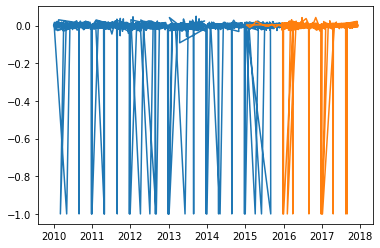

In [19]:
train = df[:1488]
test = df[-496:]
plt.plot(train)
plt.plot(test)

In [20]:
#Check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [21]:
result=adfuller(df['Gold Investments'])

In [22]:
print("The values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used")

The values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used


In [23]:
 #perform dickey fuller test  
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Gold Investments'],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

Results of dickey fuller test
Test Statistics               -1.590685e+01
p-value                        8.208406e-29
No. of lags used               7.000000e+00
Number of observations used    1.976000e+03
critical value (1%)           -3.433664e+00
critical value (5%)           -2.863004e+00
critical value (10%)          -2.567549e+00
dtype: float64


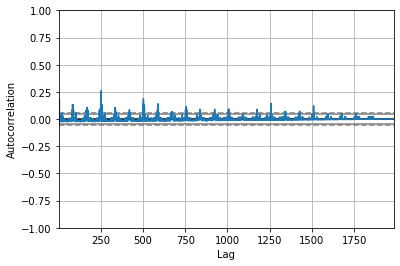

In [24]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(df['Gold Investments'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

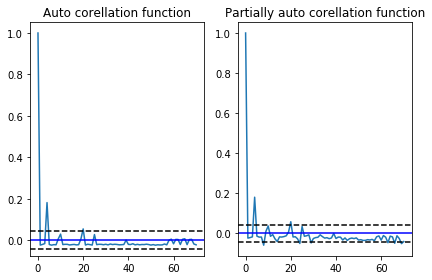

In [26]:
from statsmodels.tsa.stattools import acf,pacf
acf = acf(df, nlags=70)
pacf= pacf(df, nlags=70,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

In [27]:
import statsmodels.api as sm

In [34]:
model = sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Gold Investments   No. Observations:                 1488
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 790.912
Date:                            Sat, 31 Oct 2020   AIC                          -1571.824
Time:                                    11:54:42   BIC                          -1545.341
Sample:                                         0   HQIC                         -1561.950
                                           - 1488                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0241      0.108     -0.224      0.823      -0.235       0.187
ma.L1         -0.9997      0.122     -8.185      0.000      -1.239      -0.760
ar.S.L12      -0.0257      0.064     -0.403      0.687      -0.151       0.099
ma.S.L12      -1.0000     86.433     -0.012      0.991    -170.406     168.406
sigma2         0.0191      1.650      0.012      0.991      -3.215       3.253
===================================================================================
Ljung-Box (Q):                       86.10   Jarque-Bera (JB):            123641.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -6.57
Prob(H) (two-sided):                  0.87   Kurtosis:                        45.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

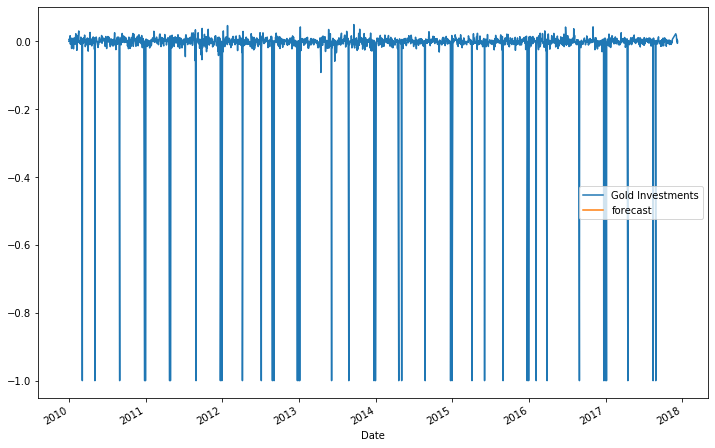

In [36]:
df['forecast']=model_fit.predict(start=2015-11-30,end=2017-11-15,dynamic = True)
df[['Gold Investments','forecast']].plot(figsize=(12,8))

In [37]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+ DateOffset(months=x) for x in range(0,12)]

In [38]:
future_datest_df= pd.DataFrame(index = future_dates [1:], columns=df.columns)

In [39]:
future_datest_df.tail()

,Gold Investments,forecast
2018-06-15,NaN,NaN
2018-07-15,NaN,NaN
2018-08-15,NaN,NaN
2018-09-15,NaN,NaN
2018-10-15,NaN,NaN
